#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

## <font color = brown> Pre-processing of training dataset

#### Loading the training dataset

In [2]:
df_train = pd.read_csv(r"D:\ICTAK\Virtual Competitions\2\loan_train.csv")

#### Loading the head of training dataset

In [3]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Getting the shape of the training dataset

In [4]:
df_train.shape

(614, 13)

#### Getting the info of the training dataset

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Finding the null values in the training dataset

In [6]:
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

###### <font color = violet> There are null values in 7 columns of the training dataset.

#### Finding the unique values in the column "Dependents" in the training dataset

In [7]:
df_train.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

#### Displaying the distribution of float-datatype columns that contain null values in the training dataset

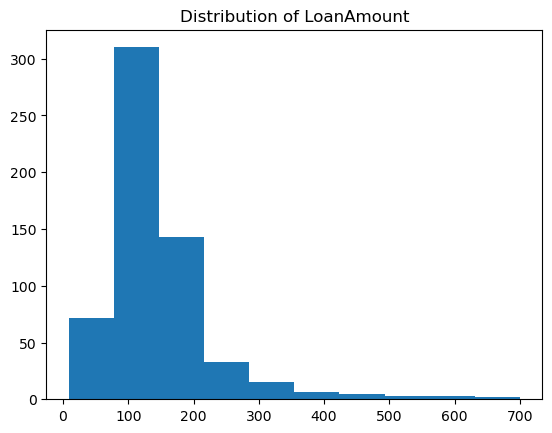

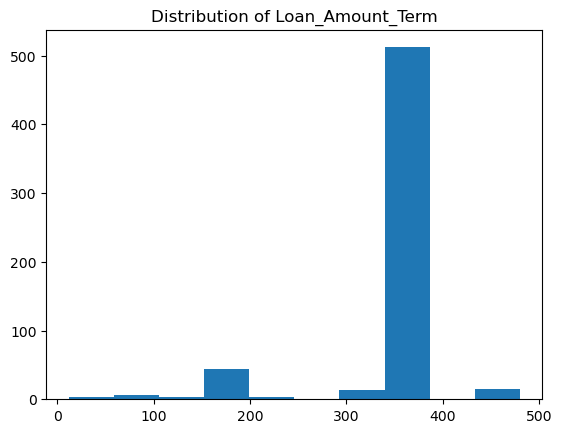

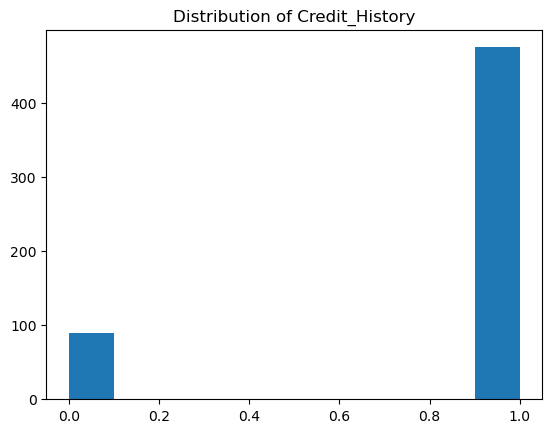

In [8]:
for i in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    plt.hist(df_train[i])
    plt.title('Distribution of {}'.format(i))
    plt.show()

###### <font color = violet> We can see that all the three float-datatype columns that contain null values of the training dataset have about skewed distribution. So we can fill the null values in these columns with their respective medians.

#### Filling the null values of the float-datatype columns of the training dataset by their respective medians

In [9]:
for j in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    df_train[j].fillna(df_train[j].median(), inplace = True)

#### Filling the null values of the string-datatype columns of the training dataset by their respective mode

In [10]:
for k in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    df_train[k].fillna(df_train[k].mode()[0], inplace = True)

#### Finding whether there is any more null values in the training dataset

In [11]:
df_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Displaying the statistical summary of the taining dataset

In [12]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


#### Finding outliers in the numerical columns of the training dataset using boxplot graph

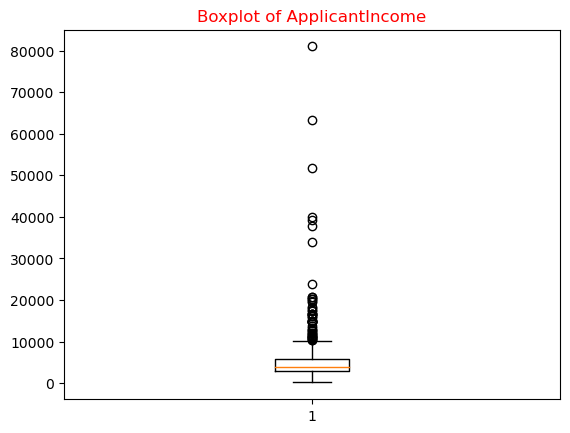

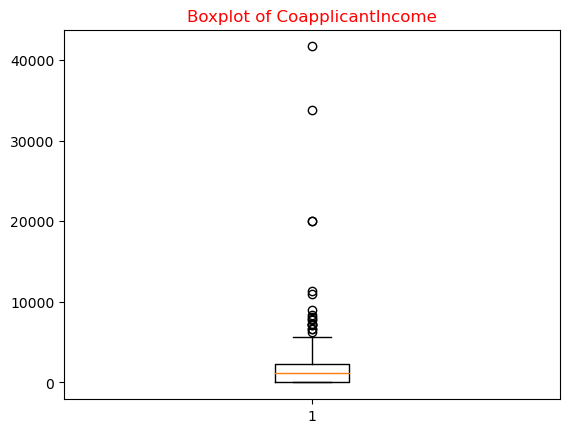

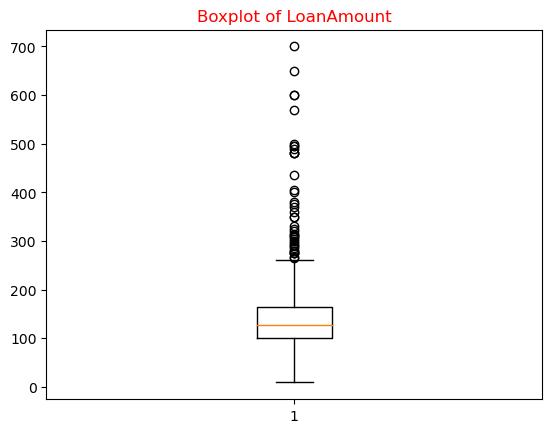

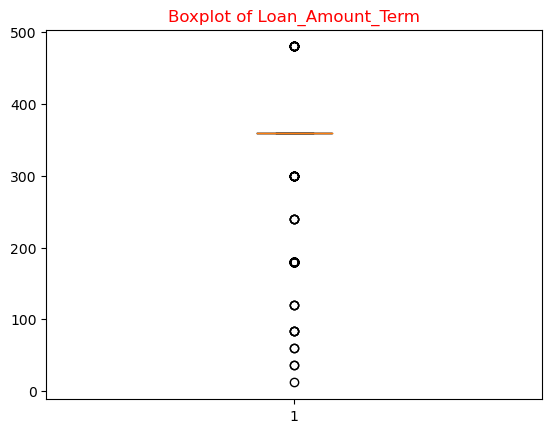

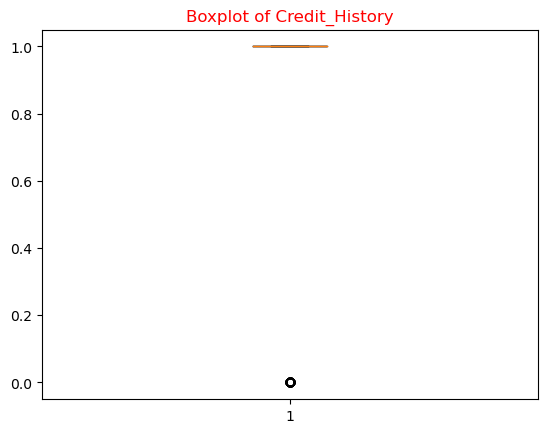

In [13]:
num_col = df_train.select_dtypes(include = ['float', 'int'])
for col in num_col:
    plt.figure()
    plt.boxplot(df_train[col])
    plt.title('Boxplot of {}'.format(col), color = 'r')
    plt.show()

#### Finding the number of outliers in each numerical columns of training dataset

In [14]:
for col in num_col:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - (1.5 * IQR)
    upp = Q3 + (1.5 * IQR)
    outliers = []
    for x in df_train[col]:
        if(x > upp) or (x < low):
            outliers.append(x)
    print('The outliers in the column', col, ' is', len(outliers))

The outliers in the column ApplicantIncome  is 50
The outliers in the column CoapplicantIncome  is 18
The outliers in the column LoanAmount  is 41
The outliers in the column Loan_Amount_Term  is 88
The outliers in the column Credit_History  is 89


###### <font color = violet> For the record, we are not removing the outliers from the training dataset.

## <font color = brown> Pre-processing of testing dataset

#### Loading the testing dataset

In [15]:
df_test = pd.read_csv(r"D:\ICTAK\Virtual Competitions\2\loan_test.csv")

#### Loading the head of the testing dataset

In [16]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


#### Getting the shape of the testing dataset

In [17]:
df_test.shape

(367, 12)

#### Getting the info of the testing dataset

In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


#### Finding the null values in the testing dataset

In [19]:
df_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

###### <font color = violet> There are null values in 6 columns in the testing dataset.

#### Displaying the distribution of float-datatype columns that contain null values in the testing dataset

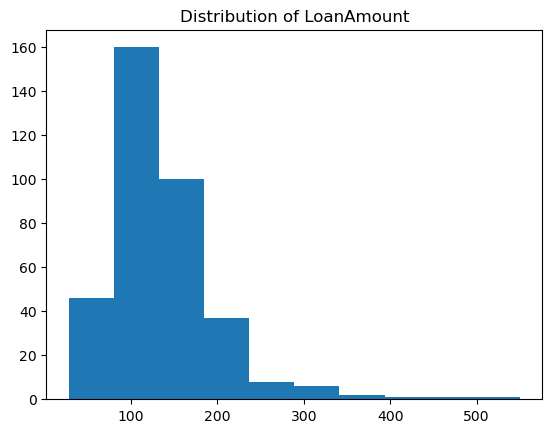

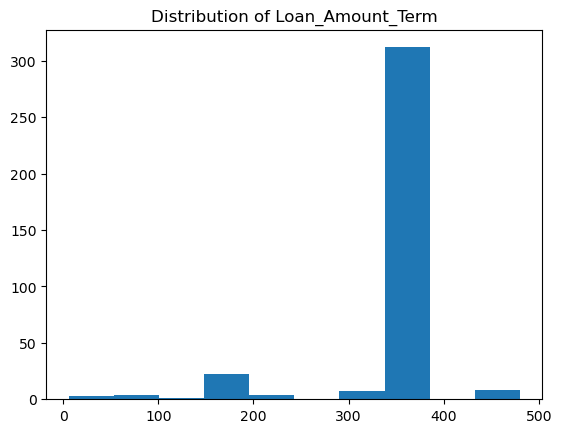

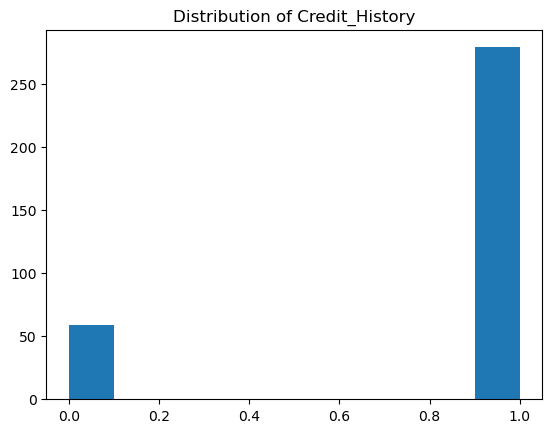

In [20]:
for i in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    plt.hist(df_test[i])
    plt.title('Distribution of {}'.format(i))
    plt.show()

###### <font color = violet> We can see that all the three float-datatype columns that contain null values of the testing dataset have about skewed distribution. So we can fill the null values in these columns with their respective medians.

#### Filling the null values of the float-datatype columns of the testing dataset by their respective medians

In [21]:
for j in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    df_test[j].fillna(df_test[j].median(), inplace = True)

#### Filling the null values of the string-datatype columns of the testing dataset by their respective mode

In [22]:
for k in ['Gender', 'Dependents', 'Self_Employed']:
    df_test[k].fillna(df_test[k].mode()[0], inplace = True)

#### Finding whether there is any more null values in the testing dataset

In [23]:
df_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

#### Displaying the statistical summary of the testing dataset

In [24]:
df_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,135.980926,342.822888,0.839237
std,4910.685399,2334.232099,60.959739,64.658402,0.367814
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


#### Finding outliers in the numerical columns of the testing dataset using boxplot graph

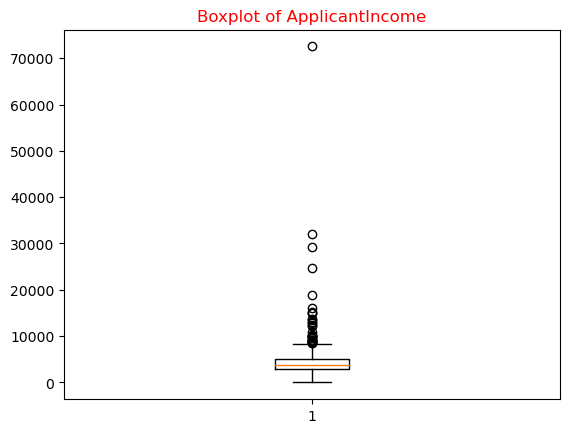

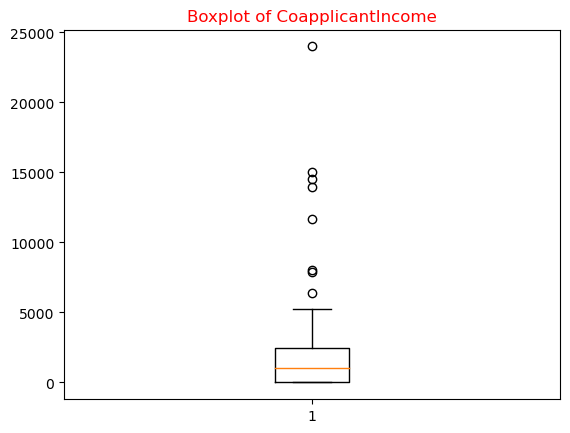

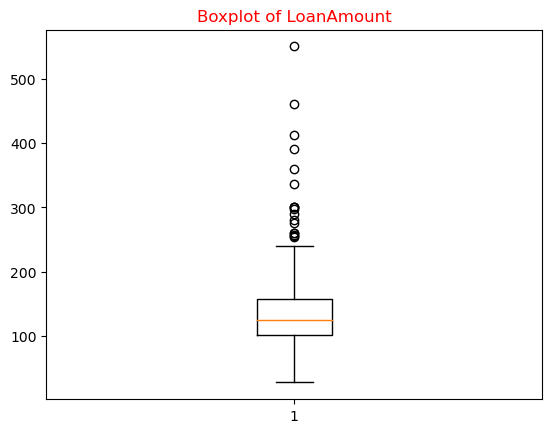

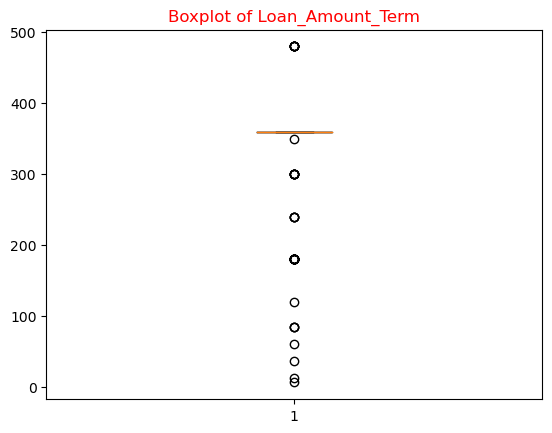

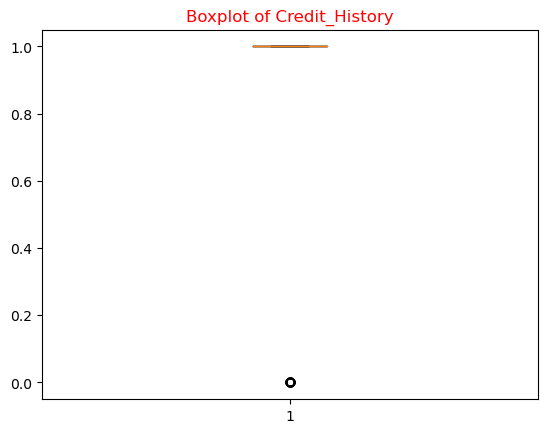

In [25]:
for col in num_col:
    plt.figure()
    plt.boxplot(df_test[col])
    plt.title('Boxplot of {}'.format(col), color = 'r')
    plt.show()

#### Finding the number of outliers in each numerical columns of testing dataset

In [26]:
for col in num_col:
    Q1 = df_test[col].quantile(0.25)
    Q3 = df_test[col].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - (1.5 * IQR)
    upp = Q3 + (1.5 * IQR)
    outliers = []
    for x in df_test[col]:
        if(x > upp) or (x < low):
            outliers.append(x)
    print('The outliers in the column', col, ' is', len(outliers))

The outliers in the column ApplicantIncome  is 32
The outliers in the column CoapplicantIncome  is 8
The outliers in the column LoanAmount  is 18
The outliers in the column Loan_Amount_Term  is 50
The outliers in the column Credit_History  is 59


###### <font color = violet> For the record, we are not removing the outliers from the testing dataset also.

#### Getting the number of unique values in the column 'Loan_ID' of training dataset

In [27]:
df_train['Loan_ID'].nunique()

614

#### Getting the number of unique values in the column 'Loan_ID' of testing dataset

In [28]:
df_test['Loan_ID'].nunique()

367

###### <font color = violet> We can see that there is no similar values in the 'Loan_ID' columns in both training and testing datasets. So we can drop the 'Loan_ID' column from both datasets.

### <font color = brown> Setting the feature training and testing variables, and target training variable

In [29]:
x_train = df_train.drop(['Loan_Status', 'Loan_ID'], axis = 1)
x_test = df_test.drop('Loan_ID', axis = 1)
y_train = df_train['Loan_Status']

## <font color = brown>  One Hot Encode

#### One hot encoding x_train

In [30]:
x_train = pd.get_dummies(x_train)
x_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


#### One hot encoding x_test

In [31]:
x_test = pd.get_dummies(x_test)
x_test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


# <font color = brown> Logistic Regression

#### Importing Logistic regression from sklearn

In [32]:
from sklearn.linear_model import LogisticRegression

#### Loading the sample submission file

In [33]:
sample = pd.read_csv(r"D:\ICTAK\Virtual Competitions\2\sample_submission.csv")

#### Loading the head of the sample dataset

In [34]:
sample.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [35]:
sample_copy = sample.copy()

#### Importing RandomizedSearchCV from sklearn

In [36]:
from sklearn.model_selection import RandomizedSearchCV

#### Creating parameters for tuning

In [37]:
penalty = ['l1', 'l2', 'elasticnet', None]
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
multi_class = ['auto', 'ovr', 'multinomial']

In [38]:
lr_random_grid = {'penalty' : penalty,
                 'solver' : solver,
                 'multi_class': multi_class}

In [39]:
logic = LogisticRegression()

#### Tuning with Randomized Search CV for logistic regression

In [40]:
lr_randomcv = RandomizedSearchCV(estimator = logic, param_distributions = lr_random_grid, n_iter = 100, cv =3, verbose = 2, n_jobs = 1)
lr_randomcv.fit(x_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END .........multi_class=auto, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........multi_class=auto, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........multi_class=auto, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....multi_class=auto, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....multi_class=auto, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....multi_class=auto, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....multi_class=auto, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....multi_class=auto, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....multi_class=auto, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END multi_class=auto, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END multi_class=auto, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END multi_class=auto, penalty=l1, solver

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END .....multi_class=auto, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....multi_class=auto, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....multi_class=auto, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END multi_class=auto, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END multi_class=auto, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END multi_class=auto, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ...........multi_class=auto, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...........multi_class=auto, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...........multi_class=auto, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........multi_class=auto, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........multi_class=auto, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........multi_class=auto, penalty=l2, solver=saga; total time=   0.0s
[CV] END .multi_class=aut

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[CV] END ..multi_class=auto, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..multi_class=auto, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..multi_class=auto, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .......multi_class=auto, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .......multi_class=auto, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .......multi_class=auto, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ...multi_class=auto, penalty=None, solver=liblinear; total time=   0.0s
[CV] END ...multi_class=auto, penalty=None, solver=liblinear; total time=   0.0s
[CV] END ...multi_class=auto, penalty=None, solver=liblinear; total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END ...multi_class=auto, penalty=None, solver=newton-cg; total time=   0.1s
[CV] END ...multi_class=auto, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END ...multi_class=auto, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END multi_class=auto, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END multi_class=auto, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END multi_class=auto, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END .........multi_class=auto, penalty=None, solver=sag; total time=   0.0s
[CV] END .........multi_class=auto, penalty=None, solver=sag; total time=   0.0s
[CV] END .........multi_class=auto, penalty=None, solver=sag; total time=   0.0s
[CV] END ........multi_class=auto, penalty=None, solver=saga; total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=6.17406e-27): result may not be accurate.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
C:\Users\HP\anaconda3\lib\site-p

[CV] END ........multi_class=auto, penalty=None, solver=saga; total time=   0.0s
[CV] END ........multi_class=auto, penalty=None, solver=saga; total time=   0.0s
[CV] END ..........multi_class=ovr, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........multi_class=ovr, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........multi_class=ovr, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......multi_class=ovr, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......multi_class=ovr, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......multi_class=ovr, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......multi_class=ovr, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......multi_class=ovr, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......multi_class=ovr, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END multi_class=ovr, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END multi_class=ovr, pe

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STO

[CV] END ...........multi_class=ovr, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...........multi_class=ovr, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..........multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..........multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......multi_class=ovr, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......multi_class=ovr, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......multi_class=ovr, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\HP\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV] END ......multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ......multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END multi_class=ovr, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END multi_class=ovr, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END multi_class=ovr, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ............multi_class=ovr, penalty=l2, solver=sag; total time=   0.0s
[CV] END ............multi_class=ovr, penalty=l2, solver=sag; total time=   0.0s
[CV] END ............multi_class=ovr, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...........multi_class=ovr, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........multi_class=ovr, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........multi_class=ovr, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..multi_class=ovr, 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[CV] END ........multi_class=ovr, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ........multi_class=ovr, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ........multi_class=ovr, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ....multi_class=ovr, penalty=None, solver=liblinear; total time=   0.0s
[CV] END ....multi_class=ovr, penalty=None, solver=liblinear; total time=   0.0s
[CV] END ....multi_class=ovr, penalty=None, solver=liblinear; total time=   0.0s
[CV] END ....multi_class=ovr, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END ....multi_class=ovr, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END ....multi_class=ovr, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END multi_class=ovr, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END multi_class=ovr, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END multi_class=ovr, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END ..........mul

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=6.17406e-27): result may not be accurate.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
C:\Users\HP\anaconda3\lib\site-p

[CV] END ..........multi_class=ovr, penalty=None, solver=sag; total time=   0.0s
[CV] END ..........multi_class=ovr, penalty=None, solver=sag; total time=   0.0s
[CV] END .........multi_class=ovr, penalty=None, solver=saga; total time=   0.0s
[CV] END .........multi_class=ovr, penalty=None, solver=saga; total time=   0.0s
[CV] END .........multi_class=ovr, penalty=None, solver=saga; total time=   0.0s
[CV] END ..multi_class=multinomial, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..multi_class=multinomial, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..multi_class=multinomial, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END multi_class=multinomial, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END multi_class=multinomial, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END multi_class=multinomial, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END multi_class=multinomial, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END multi_class

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...multi_class=multinomial, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...multi_class=multinomial, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...multi_class=multinomial, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STO

[CV] END multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\HP\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\HP\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_mo

[CV] END multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END multi_class=multinomial, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END multi_class=multinomial, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END multi_class=multinomial, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ....multi_class=multinomial, penalty=l2, solver=sag; total time=   0.0s
[CV] END ....multi_class=multinomial, penalty=l2, solver=sag; total time=   0.0s
[CV] END ....multi_class=multinomial, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...multi_class=multinomial, penalty=l2, solver=saga; total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...multi_class=multinomial, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...multi_class=multinomial, penalty=l2, solver=saga; total time=   0.0s
[CV] END multi_class=multinomial, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END multi_class=multinomial, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END multi_class=multinomial, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END multi_class=multinomial, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END multi_class=multinomial, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END multi_class=multinomial, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END multi_class=multinomial, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END multi_class=multinomial, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END multi_class=multinomial, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END multi_class=multinomia

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END multi_class=multinomial, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END multi_class=multinomial, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END multi_class=multinomial, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END multi_class=multinomial, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END multi_class=multinomial, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END ..multi_class=multinomial, penalty=None, solver=sag; total time=   0.0s
[CV] END ..multi_class=multinomial, penalty=None, solver=sag; total time=   0.0s
[CV] END ..multi_class=multinomial, penalty=None, solver=sag; total time=   0.0s
[CV] END .multi_class=multinomial, penalty=None, solver=saga; total time=   0.0s
[CV] END .multi_class=multinomial, penalty=None, solver=saga; total time=   0.0s
[CV] END .multi_class=multinomial, penalty=None, solver=saga; total time=   0.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which 

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=100, n_jobs=1,
                   param_distributions={'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   verbose=2)

#### Displaying best estimator for logistic regression

In [41]:
lr_randomcv.best_estimator_

LogisticRegression(penalty='l1', solver='liblinear')

#### Predicting with best estimator of logistic regression

In [42]:
lr_best_random = lr_randomcv.best_estimator_
y_best_pred_lr = lr_best_random.predict(x_test)

#### Replacing the 'Loan_Status' column with the prediction values from logistic regression after tuning

In [43]:
sample['Loan_Status'] = y_best_pred_lr

#### Saving the logistic regression prediction model dataset after tuning as a csv file

In [44]:
sample.to_csv(r"D:\ICTAK\Virtual Competitions\2\logistic_regression_model.csv", index = False)

###### <font color = violet> The Logistic regression model after fine tuning has accuracy about 0.7847.

# <font color = brown> k Nearest Neighbors

#### Importing KNeighborsClassifier from sklearn

In [45]:
from sklearn.neighbors import KNeighborsClassifier

#### Creating parameters for tuning

In [56]:
n_neighbors = np.arange(3,15)
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [int(i) for i in np.linspace(start = 10, stop = 100, num = 10)]
metric = ['minkowski', 'euclidean', 'manhattan', 'haversine']
p = [1,2]

In [57]:
knn_random_grid = {'n_neighbors' : n_neighbors,
                  'algorithm' : algorithm,
                  'leaf_size' : leaf_size,
                  'metric' : metric,
                  'p' : p}

In [58]:
knn = KNeighborsClassifier()

In [59]:
knn_randomcv = RandomizedSearchCV(estimator = knn, param_distributions = knn_random_grid, n_iter = 100, cv =3, verbose = 2, n_jobs = 1)
knn_randomcv.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END algorithm=ball_tree, leaf_size=70, metric=manhattan, n_neighbors=5, p=1; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=70, metric=manhattan, n_neighbors=5, p=1; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=70, metric=manhattan, n_neighbors=5, p=1; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=haversine, n_neighbors=7, p=1; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=haversine, n_neighbors=7, p=1; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=haversine, n_neighbors=7, p=1; total time=   0.0s
[CV] END algorithm=brute, leaf_size=90, metric=minkowski, n_neighbors=10, p=1; total time=   0.0s
[CV] END algorithm=brute, leaf_size=90, metric=minkowski, n_neighbors=10, p=1; total time=   0.0s
[CV] END algorithm=brute, leaf_size=90, metric=minkowski, n_neighbors=10, p=1; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=70, m

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py", line 649, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 824, in kneighbors
    results = ArgKmin.com

[CV] END algorithm=auto, leaf_size=70, metric=minkowski, n_neighbors=4, p=1; total time=   0.0s
[CV] END algorithm=auto, leaf_size=70, metric=minkowski, n_neighbors=4, p=1; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=70, metric=haversine, n_neighbors=9, p=2; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=70, metric=haversine, n_neighbors=9, p=2; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=70, metric=haversine, n_neighbors=9, p=2; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=13, p=1; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=13, p=1; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=40, metric=minkowski, n_neighbors=13, p=1; total time=   0.0s
[CV] END algorithm=brute, leaf_size=100, metric=minkowski, n_neighbors=8, p=2; total time=   0.0s
[CV] END algorithm=brute, leaf_size=100, metric=minkowski, n_neighbors=8, p=2; total time=   0.0s
[CV] END algori

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py", line 649, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 824, in kneighbors
    results = ArgKmin.com

[CV] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=12, p=2; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=manhattan, n_neighbors=12, p=2; total time=   0.0s
[CV] END algorithm=brute, leaf_size=70, metric=minkowski, n_neighbors=3, p=1; total time=   0.0s
[CV] END algorithm=brute, leaf_size=70, metric=minkowski, n_neighbors=3, p=1; total time=   0.0s
[CV] END algorithm=brute, leaf_size=70, metric=minkowski, n_neighbors=3, p=1; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=90, metric=haversine, n_neighbors=4, p=1; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=90, metric=haversine, n_neighbors=4, p=1; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=90, metric=haversine, n_neighbors=4, p=1; total time=   0.0s
[CV] END algorithm=auto, leaf_size=50, metric=euclidean, n_neighbors=8, p=1; total time=   0.0s
[CV] END algorithm=auto, leaf_size=50, metric=euclidean, n_neighbors=8, p=1; total time=   0.0s
[CV] END algorithm=auto, l

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py", line 649, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 824, in kneighbors
    results = ArgKmin.com

[CV] END algorithm=brute, leaf_size=50, metric=haversine, n_neighbors=10, p=1; total time=   0.0s
[CV] END algorithm=brute, leaf_size=50, metric=haversine, n_neighbors=10, p=1; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=10, p=2; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=10, p=2; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=40, metric=manhattan, n_neighbors=10, p=2; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=80, metric=minkowski, n_neighbors=3, p=1; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=80, metric=minkowski, n_neighbors=3, p=1; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=80, metric=minkowski, n_neighbors=3, p=1; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=40, metric=haversine, n_neighbors=12, p=2; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=40, metric=haversine, n_neighbors=12, p=2; total time=   0.0s
[

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py", line 649, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 824, in kneighbors
    results = ArgKmin.com

[CV] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=3, p=2; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=3, p=2; total time=   0.0s
[CV] END algorithm=auto, leaf_size=70, metric=minkowski, n_neighbors=10, p=2; total time=   0.0s
[CV] END algorithm=auto, leaf_size=70, metric=minkowski, n_neighbors=10, p=2; total time=   0.0s
[CV] END algorithm=auto, leaf_size=70, metric=minkowski, n_neighbors=10, p=2; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=14, p=1; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=14, p=1; total time=   0.0s
[CV] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=14, p=1; total time=   0.0s
[CV] END algorithm=brute, leaf_size=50, metric=manhattan, n_neighbors=4, p=1; total time=   0.0s
[CV] END algorithm=brute, leaf_size=50, metric=manhattan, n_neighbors=4, p=1; total time=   0.0s
[CV] END algorithm=brute, l

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py", line 649, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 824, in kneighbors
    results = ArgKmin.com

[CV] END algorithm=brute, leaf_size=30, metric=haversine, n_neighbors=14, p=1; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=12, p=1; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=12, p=1; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=12, p=1; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=70, metric=minkowski, n_neighbors=13, p=1; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=70, metric=minkowski, n_neighbors=13, p=1; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=70, metric=minkowski, n_neighbors=13, p=1; total time=   0.0s
[CV] END algorithm=auto, leaf_size=40, metric=euclidean, n_neighbors=4, p=1; total time=   0.0s
[CV] END algorithm=auto, leaf_size=40, metric=euclidean, n_neighbors=4, p=1; total time=   0.0s
[CV] END algorithm=auto, leaf_size=40, metric=euclidean, n_neighbors=4, p=1; total time=   0.1s
[CV] END algorith

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py", line 649, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 824, in kneighbors
    results = ArgKmin.com

[CV] END algorithm=auto, leaf_size=60, metric=haversine, n_neighbors=14, p=2; total time=   0.0s
[CV] END algorithm=auto, leaf_size=60, metric=haversine, n_neighbors=14, p=2; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=6, p=1; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=6, p=1; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=6, p=1; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=100, metric=haversine, n_neighbors=11, p=2; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=100, metric=haversine, n_neighbors=11, p=2; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=100, metric=haversine, n_neighbors=11, p=2; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=8, p=2; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=40, metric=minkowski, n_neighbors=8, p=2; total time=   0.0

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py", line 649, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 824, in kneighbors
    results = ArgKmin.com

[CV] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=6, p=2; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=90, metric=haversine, n_neighbors=11, p=1; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=90, metric=haversine, n_neighbors=11, p=1; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=90, metric=haversine, n_neighbors=11, p=1; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=haversine, n_neighbors=12, p=2; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=haversine, n_neighbors=12, p=2; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=haversine, n_neighbors=12, p=2; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=10, p=1; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=10, p=1; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=10, p=1; total time=   

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
48 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 215, in fit
    return self._fit(X, y)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 493, in _fit
    self._check_algorithm_metric()
  File "C:\Users\HP\anaconda3\lib\site-packages\sklear

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=100, n_jobs=1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'metric': ['minkowski', 'euclidean',
                                                   'manhattan', 'haversine'],
                                        'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'p': [1, 2]},
                   verbose=2)

#### Displaying best estimator randomcv for knn

In [60]:
knn_randomcv.best_estimator_

KNeighborsClassifier(leaf_size=10, metric='manhattan', n_neighbors=13)

In [61]:
knn_best_random = knn_randomcv.best_estimator_

#### Importing GridSearchCV from sklearn

In [62]:
from sklearn.model_selection import GridSearchCV

#### Creating parameter for GirdSearchCV

In [63]:
param_grid_knn = {'n_neighbors' : [knn_randomcv.best_params_['n_neighbors']-3,
                              knn_randomcv.best_params_['n_neighbors']-2,
                              knn_randomcv.best_params_['n_neighbors']-1,
                              knn_randomcv.best_params_['n_neighbors']],
              'algorithm' : [knn_randomcv.best_params_['algorithm']],
              'leaf_size' : [knn_randomcv.best_params_['leaf_size'],
                            knn_randomcv.best_params_['leaf_size']+10],
              'metric' : [knn_randomcv.best_params_['metric']],
              'p' : [knn_randomcv.best_params_['p']]    
}

In [64]:
grid_search_knn = GridSearchCV(estimator = knn, param_grid = param_grid_knn, cv = 10, n_jobs = 1, verbose =2)
grid_search_knn.fit(x_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=10, p=2; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=10, p=2; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=10, p=2; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=10, p=2; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=10, p=2; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=10, p=2; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=10, p=2; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=10, p=2; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=10, p=2; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbo

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'algorithm': ['auto'], 'leaf_size': [10, 20],
                         'metric': ['manhattan'],
                         'n_neighbors': [10, 11, 12, 13], 'p': [2]},
             verbose=2)

#### Displaying best estimator gridcv for knn

In [65]:
grid_search_knn.best_estimator_

KNeighborsClassifier(leaf_size=10, metric='manhattan', n_neighbors=11)

#### Predicting with best estimator of knn

In [66]:
best_grid_knn = grid_search_knn.best_estimator_
y_best_pred_knn = best_grid_knn.predict(x_test)

#### Replacing the 'Loan_Status' column with the prediction values from knn

In [67]:
sample['Loan_Status'] = y_best_pred_knn

#### Saving the knn prediction model dataset as a csv file

In [68]:
sample.to_csv(r"D:\ICTAK\Virtual Competitions\2\knn_model.csv", index = False)

###### <font color = violet> The knn model after fine tuning has accuracy about 0.6875.

# <font color = brown> Decision Tree

#### Importing Decision Tree from sklearn

In [69]:
from sklearn.tree import DecisionTreeClassifier

#### Creating parameters for tuning

In [70]:
criterion = ['entropy', 'gini', 'log_loss']
max_features = ['sqrt', 'auto', 'log2']
max_depth = [int(i) for i in np.linspace(start = 10, stop = 1000, num = 10)]
min_samples_split = [2,5,10,14]
min_samples_leaf = [1,2,4,6,8]

In [72]:
dt_random_grid = {'criterion' : criterion,
                 'max_features' : max_features,
                 'max_depth' : max_depth,
                 'min_samples_split' : min_samples_split,
                 'min_samples_leaf' : min_samples_leaf}

In [73]:
dt = DecisionTreeClassifier()

In [74]:
dt_randomcv = RandomizedSearchCV(estimator = dt, param_distributions = dt_random_grid, n_iter = 100, cv =3, verbose = 2, n_jobs = 1)
dt_randomcv.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END criterion=entropy, max_depth=450, max_features=log2, min_samples_leaf=8, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=450, max_features=log2, min_samples_leaf=8, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=450, max_features=log2, min_samples_leaf=8, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=6, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=6, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=6, min_samples_split=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1000, max_features=log2, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=log_loss, max_depth=1000, max_features=log2, min_samples_leaf=6, 

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'criterion': ['entropy', 'gini',
                                                      'log_loss'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['sqrt', 'auto',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14]},
                   verbose=2)

#### Displaying best estimator randomcv for decision tree

In [75]:
dt_randomcv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=230, max_features='auto',
                       min_samples_leaf=8, min_samples_split=14)

In [76]:
dt_best_random = dt_randomcv.best_estimator_

#### Creating parameter for GirdSearchCV

In [77]:
param_grid_dt = {
    'criterion' : [dt_randomcv.best_params_['criterion']],
    'max_depth' : [dt_randomcv.best_params_['max_depth']],
    'max_features' : [dt_randomcv.best_params_['max_features']],
    'min_samples_leaf' : [dt_randomcv.best_params_['min_samples_leaf'],
                          dt_randomcv.best_params_['min_samples_leaf']+2,
                          dt_randomcv.best_params_['min_samples_leaf']+4],
    'min_samples_split' : [dt_randomcv.best_params_['min_samples_split']-2,
                           dt_randomcv.best_params_['min_samples_split']-1,
                           dt_randomcv.best_params_['min_samples_split'],
                           dt_randomcv.best_params_['min_samples_split']+1,
                           dt_randomcv.best_params_['min_samples_split']+2]
              }

In [78]:
grid_search_dt = GridSearchCV(estimator = dt, param_grid = param_grid_dt, cv = 10, n_jobs = 1, verbose = 2)
grid_search_dt.fit(x_train, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV] END criterion=entropy, max_depth=230, max_features=auto, min_samples_leaf=8, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=230, max_features=auto, min_samples_leaf=8, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=230, max_features=auto, min_samples_leaf=8, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=230, max_features=auto, min_samples_leaf=8, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=230, max_features=auto, min_samples_leaf=8, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=230, max_features=auto, min_samples_leaf=8, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=230, max_features=auto, min_samples_leaf=8, min_samples_split=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=230, max_features=auto, min_samples_le

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['entropy'], 'max_depth': [230],
                         'max_features': ['auto'],
                         'min_samples_leaf': [8, 10, 12],
                         'min_samples_split': [12, 13, 14, 15, 16]},
             verbose=2)

#### Displaying best estimator gridcv for decision tree

In [79]:
grid_search_dt.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=230, max_features='auto',
                       min_samples_leaf=12, min_samples_split=15)

#### Predicting with best estimator of decision tree

In [80]:
best_grid_dt = grid_search_dt.best_estimator_
y_best_pred_dt = best_grid_dt.predict(x_test)

#### Replacing the 'Loan_Status' column with the prediction values from decision tree

In [81]:
sample['Loan_Status'] = y_best_pred_dt

#### Saving the decision tree prediction model dataset as a csv file

In [82]:
sample.to_csv(r"D:\ICTAK\Virtual Competitions\2\decision_tree_model.csv", index = False)

###### <font color = violet> The decision tree model after fine tuning has accuracy about 0.6667.

# <font color = brown> Random Forest

#### Importing Random Forest from sklearn

In [83]:
from sklearn.ensemble import RandomForestClassifier

#### Creating parameters for tuning

In [84]:
criterion = ['entropy', 'gini', 'log_loss']
max_features = ['sqrt', 'auto', 'log2']
max_depth = [int(i) for i in np.linspace(start = 10, stop = 1000, num = 10)]
min_samples_split = [2,5,10,14]
min_samples_leaf = [1,2,4,6,8]
n_estimators = [int(i) for i in np.linspace(start = 200, stop = 2000, num = 20)]

In [86]:
rf_random_grid = {'criterion' : criterion,
                 'max_features' : max_features,
                 'max_depth' : max_depth,
                 'min_samples_split' : min_samples_split,
                 'min_samples_leaf' : min_samples_leaf,
                 'n_estimators' : n_estimators
                 }

In [87]:
rf = RandomForestClassifier()

In [88]:
rf_randomcv = RandomizedSearchCV(estimator = rf, param_distributions = rf_random_grid, n_iter = 100, cv =3, verbose = 2, n_jobs = 1)
rf_randomcv.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END criterion=log_loss, max_depth=1000, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1052; total time=   3.3s
[CV] END criterion=log_loss, max_depth=1000, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1052; total time=   3.3s
[CV] END criterion=log_loss, max_depth=1000, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1052; total time=   3.4s
[CV] END criterion=log_loss, max_depth=670, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=1526; total time=   4.7s
[CV] END criterion=log_loss, max_depth=670, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=1526; total time=   4.9s
[CV] END criterion=log_loss, max_depth=670, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=1526; total time=   4.6s
[CV] END criterion=gini, max_depth=230, max_features=sqrt, min_samples_leaf=6, 

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'criterion': ['entropy', 'gini',
                                                      'log_loss'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['sqrt', 'auto',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 294, 389, 484,
                                                         578, 673, 768, 863,
                                                         957, 1052, 1147, 1242,
                                                         1336, 1431, 1526, 1621,
                                                         1715, 1810, 1905,
                                                         2000]},
                   verbose=2)

#### Displaying best estimator randomcv for random forest

In [90]:
rf_randomcv.best_estimator_

RandomForestClassifier(criterion='log_loss', max_depth=670, max_features='auto',
                       min_samples_split=14, n_estimators=200)

In [91]:
rf_best_random = rf_randomcv.best_estimator_

#### Creating parameter for GirdSearchCV

In [92]:
param_grid_rf = {
    'criterion' : [rf_randomcv.best_params_['criterion']],
    'max_depth' : [rf_randomcv.best_params_['max_depth']],
    'max_features' : [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf' : [rf_randomcv.best_params_['min_samples_leaf']-4,
                          rf_randomcv.best_params_['min_samples_leaf']-2,
                          rf_randomcv.best_params_['min_samples_leaf'],
                          rf_randomcv.best_params_['min_samples_leaf']+2,
                          rf_randomcv.best_params_['min_samples_leaf']+4],
    'min_samples_split' : [rf_randomcv.best_params_['min_samples_split']-2,
                           rf_randomcv.best_params_['min_samples_split']-1,
                           rf_randomcv.best_params_['min_samples_split'],
                           rf_randomcv.best_params_['min_samples_split']+1,
                           rf_randomcv.best_params_['min_samples_split']+2],
    'n_estimators' : [rf_randomcv.best_params_['n_estimators']-200,
                      rf_randomcv.best_params_['n_estimators']-100,
                      rf_randomcv.best_params_['n_estimators'],
                      rf_randomcv.best_params_['n_estimators']+100,
                      rf_randomcv.best_params_['n_estimators']+200,]
              }

In [93]:
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid_rf, cv = 10, n_jobs = 1, verbose =2)
grid_search_rf.fit(x_train, y_train)

Fitting 10 folds for each of 125 candidates, totalling 1250 fits
[CV] END criterion=log_loss, max_depth=670, max_features=auto, min_samples_leaf=-3, min_samples_split=12, n_estimators=0; total time=   0.0s
[CV] END criterion=log_loss, max_depth=670, max_features=auto, min_samples_leaf=-3, min_samples_split=12, n_estimators=0; total time=   0.0s
[CV] END criterion=log_loss, max_depth=670, max_features=auto, min_samples_leaf=-3, min_samples_split=12, n_estimators=0; total time=   0.0s
[CV] END criterion=log_loss, max_depth=670, max_features=auto, min_samples_leaf=-3, min_samples_split=12, n_estimators=0; total time=   0.0s
[CV] END criterion=log_loss, max_depth=670, max_features=auto, min_samples_leaf=-3, min_samples_split=12, n_estimators=0; total time=   0.0s
[CV] END criterion=log_loss, max_depth=670, max_features=auto, min_samples_leaf=-3, min_samples_split=12, n_estimators=0; total time=   0.0s
[CV] END criterion=log_loss, max_depth=670, max_features=auto, min_samples_leaf=-3, min_s

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
650 fits failed out of a total of 1250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\u

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['log_loss'], 'max_depth': [670],
                         'max_features': ['auto'],
                         'min_samples_leaf': [-3, -1, 1, 3, 5],
                         'min_samples_split': [12, 13, 14, 15, 16],
                         'n_estimators': [0, 100, 200, 300, 400]},
             verbose=2)

#### Displaying best estimator gridcv for random forest

In [94]:
grid_search_rf.best_estimator_

RandomForestClassifier(criterion='log_loss', max_depth=670, max_features='auto',
                       min_samples_split=16, n_estimators=300)

#### Predicting with best estimator of random forest

In [95]:
best_grid_rf = grid_search_rf.best_estimator_
y_best_pred_rf = best_grid_rf.predict(x_test)

#### Replacing the 'Loan_Status' column with the prediction values from random forest

In [96]:
sample['Loan_Status'] = y_best_pred_rf

#### Saving the random forest prediction model dataset as a csv file

In [97]:
sample.to_csv(r"D:\ICTAK\Virtual Competitions\2\random_forest_model.csv", index = False)

###### <font color = violet> The random forest model after fine tuning has accuracy about 0.7778.

# <font color = brown> SVM Model

#### Importing SVC from sklearn

In [98]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')

#### Predicting with svc

In [99]:
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)

#### Replacing the 'Loan_Status' column with the prediction values from random forest

In [100]:
sample['Loan_Status'] = y_pred_svc

#### Saving the svc prediction model dataset as a csv file

In [101]:
sample.to_csv(r"D:\ICTAK\Virtual Competitions\2\svc_model.csv", index = False)

###### <font color = violet> The svc model after fine tuning has accuracy about 0.7569.

### <font color = red> The logistic regression model has the highest accuracy.